# ベル不等式の破れを量子コンピュータで実験する
ベル不等式とは、局所実在論で記述される物理と量子力学の違いを実験的に検証するための不等式です。

## 局所実在論とは
局所性とは、離れた場所に何らかの影響（物質や情報の伝搬）が高速を超えて及ぶことはないというものです。実在性とは全ての物理量には、その測定結果を与える実在の要素が備わっている（物理量の値は測定をしなくてもあらかじめ定められている）という性質です。量子力学の登場までは、全ての物理学はこの性質を満たしています。我々が観測しようと、しまいと、ある粒子は位置$x$と運動量$p$の定まった値をとります。しかし、量子力学では全ての物理量を確実に定めることはできません。この結果、測定結果はランダムに与えられるという確率的な理論になっています。アインシュタインは、1935年に、量子もつれを例に、量子力学は局所実在性を満たしていないので、物理の理論として完全ではない、すなわち間違っていると指摘しました。

## 隠れた変数理論
しかし、これは我々の物理への理解が不十分というのが理由かもしれません。我々が知らない未知のパラメータ、「隠れた変数」（実在の要素）があり、それを完全に知ることができれば、ランダムネスを排除し、全ての物理量を完全に定めることができるかもしれません。

## ベル不等式（CHSH不等式）
ベル不等式は、ジョン・ベルによって導出された未知の理論も含め一般的に局所的な隠れた変数理論（局所実在論）が満たすべき不等式です。実験のしやすい量子ビット系へとジョン・クラウザーらが拡張をしたものはCHSH不等式と呼ばれています。

AliceとBobが十分に離れた２地点で実験を行います。AliceとBobの測定器にはパラメータ$\theta, \phi$がついておりそれぞれ自由に変えることができます。この時、隠れた変数$\lambda$さえ知っていれば、AliceとBobの測定結果は、ランダムネスがなく完全に計算されると仮定しましょう：
$$
A(\theta, \lambda), \;\;\; B(\phi, \lambda)
$$
ただし、測定結果は、$-1 \leq A(\theta, \lambda), B(\phi, \lambda) \leq 1$となるように規格化されているとします。
この測定を$N$回繰り返し、$\theta,\phi$を適当に取った時にこの測定結果の平均値
$$
A(\theta) = N \sum _{i=1}^{N} A(\theta, \lambda_i) , \;\;\; B(\phi) = N \sum _{i=1}^{N} B(\phi, \lambda_i) 
$$
がどのように振る舞うのか調べましょう。（隠れた変数はあるものの、Alice と Bobはそれを知らずに実験をやり平均値を計算します）

この時、Aliceは2種類のパラメータ$\theta$と$\theta'$を選び、Bobは$\phi$、$\phi'$を選ぶことにします。得られる４パターンの結果について以下のような量を計算しましょう：
$$
C = A(\theta) B(\phi, \lambda) + A(\theta') B(\phi, \lambda) - A(\theta) B(\phi') + A(\theta') B(\phi')
$$
みやすくするために、$A=A(\theta)$, $A' =  A(\theta')$、同様に、$B$、$B'$で記述しましょう。すると、
$$
|C| = |AB + A'B - AB' +A'B'| \leq |(A+A')B| + |(-A+A)B'| \leq |A+A'| + |-A+A'| \leq 2
$$
となります。つまり、$C$という量を計算するとその値は必ず$-2$から$2$の値に収まります。

## 量子力学によるベル不等式の破れ

量子力学特有の現象、量子もつれを用いるとベル不等式を破ることが理論的に予言することができます。ということは、我々の自然界が、局所実在論（局所的な隠れた変数理論）で説明できるのが、もしくは局所性もしくは実在性のどちらかを破る必要があるのか（測定結果がランダムになるのは、我々の物理への理解が不完全なのではなく、そもそもそのように自然界が作られているのか）を決着をつけることができます。

## IBMQを用いた量子コンピュータ実験
2016年ごろから、IBMが無償で量子コンピュータを公開しています。

In [8]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install pylatexenc

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 3.9 MB/s eta 0:00:00a 0:00:01


必要なモジュールを読み込みます。

In [1]:
# General
import numpy as np

# Qiskit imports
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.quantum_info import SparsePauliOp

# Qiskit Runtime imports
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import EstimatorV2 as Estimator

# Plotting routines
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

/Users/keisukefujii/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


アカウント認証をします。IBM Quantumのアカウントは無償で利用でき、１ヶ月10分まで量子コンピュータを利用できます。以下では、同じフォルダに、IBM_token.txtを作りそこにtoken情報が書かれているとします。自分のtokenはIBM Quantumのポータルから取得することができます。

In [42]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
# IBM_token.txtからトークンを読み込む
with open("IBM_token.txt", "r") as token_file:
    my_token = token_file.read().strip()

# Save an IBM Quantum account and set it as your default account.
service = QiskitRuntimeService(channel="ibm_quantum", token=my_token) 


どのような量子コンピュータが利用可能かみてみましょう。

In [41]:
service = QiskitRuntimeService(channel="ibm_quantum")

# To run on hardware, select the backend with the fewest number of jobs in the queue
backend = service.least_busy(operational=True, simulator=False, min_num_qubits=127)

# 利用可能なバックエンドの一覧を取得
#backends = service.backends()
# 利用可能なバックエンドを表示
#for backend in backends:

print(backend.name)


ibm_brisbane


パラメータを導入し、複数のパラメータを代入した場合の計算をまとめて実行できるように回路を定義します。

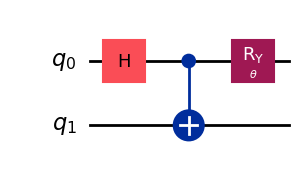

In [21]:
theta = Parameter("$\\theta$")

chsh_circuit = QuantumCircuit(2)
chsh_circuit.h(0)
chsh_circuit.cx(0, 1)
chsh_circuit.ry(theta, 0)
chsh_circuit.draw(output="mpl", idle_wires=False, style="iqp")

パラメータに代入する値を定義しておきます。

In [22]:
number_of_phases = 21
phases = np.linspace(0, 2 * np.pi, number_of_phases)
# Phases need to be expressed as list of lists in order to work
individual_phases = [[ph] for ph in phases]

CHSH不等式を計算するための物理量を定義します。回路のパラメータ$\theta$の選択と、XもしくはZの2種類の基底で測定する、という設定で４パターンの測定を定義します。以下のどちらか一方でも構いません。

In [23]:
# <CHSH1> = <AB> - <Ab> + <aB> + <ab> -> <ZZ> - <ZX> + <XZ> + <XX>
observable1 = SparsePauliOp.from_list([("ZZ", 1), ("ZX", -1), ("XZ", 1), ("XX", 1)])

# <CHSH2> = <AB> + <Ab> - <aB> + <ab> -> <ZZ> + <ZX> - <XZ> + <XX>
observable2 = SparsePauliOp.from_list([("ZZ", 1), ("ZX", 1), ("XZ", -1), ("XX", 1)])

実際の量子コンピュータ上で実行可能な命令セット回路に変換（トランスパイル）します。

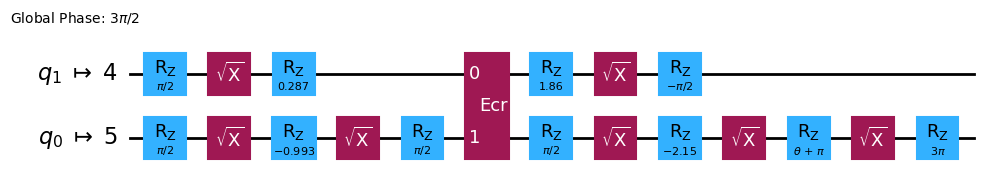

In [24]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

chsh_isa_circuit = pm.run(chsh_circuit)
chsh_isa_circuit.draw(output="mpl", idle_wires=False, style="iqp")

上記の配置に基づいて、物理量も再配置します。

In [25]:
isa_observable1 = observable1.apply_layout(layout=chsh_isa_circuit.layout)
isa_observable2 = observable2.apply_layout(layout=chsh_isa_circuit.layout)

これで準備が整ったので、実機にジョブを投入します。時間帯などによりますが、空いていいたら数分で、混んでいたら数時間で結果が返ってきます。IBM Quantumのポータルサイトからjobが投入されていることが確認できます。また、このjupyter notebookのセッションを閉じても、jobのidがあれば、測定結果を後から取り出すことも可能です。

In [34]:
# To run on a local simulator:
# Use the StatevectorEstimator from qiskit.primitives instead.

estimator = Estimator(mode=backend)

pub = (
    chsh_isa_circuit,  # ISA circuit
    [[isa_observable1], [isa_observable2]],  # ISA Observables
    individual_phases,  # Parameter values
)

job_result = estimator.run(pubs=[pub]).result()

ValidationError: 1 validation error for EstimatorOptions
mitigation_overhead
  Unexpected keyword argument [type=unexpected_keyword_argument, input_value=0, input_type=int]
    For further information visit https://errors.pydantic.dev/2.9/v/unexpected_keyword_argument

IBM Quantumのポータルサイトから、jobのIDを取得し、実験結果を再取得することもできます。

In [45]:
job = service.job('your_job_id')
job_result = job.result()


IBMRuntimeError: 'Failed to delete job: \'HTTPSConnectionPool(host=\\\'api.quantum.ibm.com\\\', port=443): Max retries exceeded with url: /runtime/jobs/cwbvg5r9ezk000892qp0 (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x169cbf7f0>: Failed to resolve \\\'api.quantum.ibm.com\\\' ([Errno 8] nodename nor servname provided, or not known)"))\''

得られた結果をグラフにプロットして、どのようなパラメータ$\theta$に対して、CHSH不等式が破れるかみてみましょう。

In [36]:
chsh1_est = job_result[0].data.evs[0]
chsh2_est = job_result[0].data.evs[1]

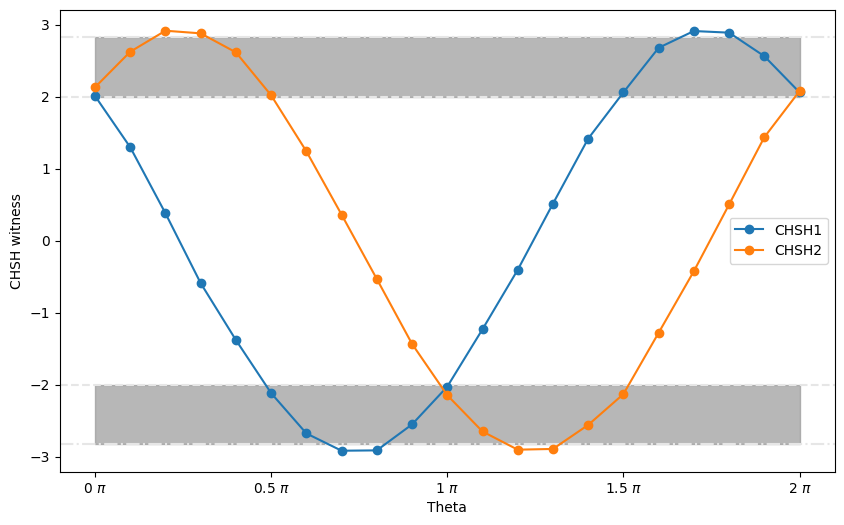

In [38]:
fig, ax = plt.subplots(figsize=(10, 6))

# results from hardware
ax.plot(phases / np.pi, chsh1_est, "o-", label="CHSH1", zorder=3)
ax.plot(phases / np.pi, chsh2_est, "o-", label="CHSH2", zorder=3)

# classical bound +-2
ax.axhline(y=2, color="0.9", linestyle="--")
ax.axhline(y=-2, color="0.9", linestyle="--")

# quantum bound, +-2√2
ax.axhline(y=np.sqrt(2) * 2, color="0.9", linestyle="-.")
ax.axhline(y=-np.sqrt(2) * 2, color="0.9", linestyle="-.")
ax.fill_between(phases / np.pi, 2, 2 * np.sqrt(2), color="0.6", alpha=0.7)
ax.fill_between(phases / np.pi, -2, -2 * np.sqrt(2), color="0.6", alpha=0.7)

# set x tick labels to the unit of pi
ax.xaxis.set_major_formatter(tck.FormatStrFormatter("%g $\\pi$"))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=0.5))

# set labels, and legend
plt.xlabel("Theta")
plt.ylabel("CHSH witness")
plt.legend()
plt.show()

## 課題
自分の環境でIBMQを使ってCHSH不等式の破れの実験を実行してください。

（アカウント認証関係でうまくいかない人は、Qulacs GUIを用いるか、そこにあるローカルシミュレータを用いてシミュレーションをしてください）